In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
hyper_df = pd.read_csv("./hyperparameter_tuning.csv")
hyper_df

,Unnamed: 0,style_weight,epoch,total_loss,style_loss,content_loss
0,0,1.000,1,5.215565e+09,5.215565e+09,0.00
1,1,1.000,2,1.489613e+10,1.489405e+10,2086447.20
2,2,1.000,3,2.036894e+10,2.036633e+10,2605585.20
3,3,1.000,4,1.222007e+10,1.221763e+10,2448039.20
4,4,1.000,5,1.025339e+10,1.025087e+10,2524374.80
...,...,...,...,...,...,...
395,395,0.001,96,1.008428e+06,4.336224e+05,574805.50
396,396,0.001,97,9.978721e+05,4.274957e+05,570376.50
397,397,0.001,98,9.875782e+05,4.216402e+05,565938.00
398,398,0.001,99,9.776625e+05,4.159921e+05,561670.40


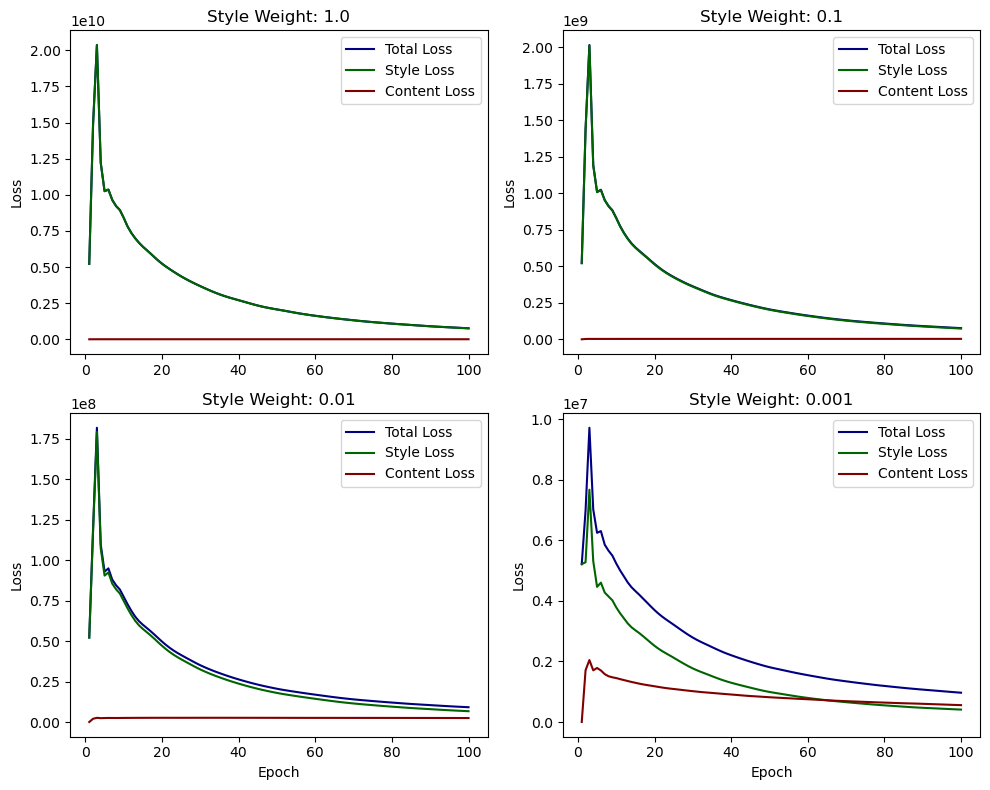

In [12]:
# re-defining unique_style_weights
unique_style_weights = hyper_df['style_weight'].unique()

# creating a 2x2 grid for the subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# flattening the axes array for easy iteration
axes = axes.flatten()

# define the color of the line
color_list = {
    'total_loss': 'navy',   # Dark blue for Total Loss
    'style_loss': 'darkgreen', # Dark green for Style Loss
    'content_loss': 'maroon' # Maroon for Content Loss
}

# plotting each type of loss for each style weight
for i, style_weight in enumerate(unique_style_weights):
    subset = hyper_df[hyper_df['style_weight'] == style_weight]
    axes[i].plot(subset['epoch'], subset['total_loss'], label='Total Loss', color=color_list['total_loss'])
    axes[i].plot(subset['epoch'], subset['style_loss'], label='Style Loss', color=color_list['style_loss'])
    axes[i].plot(subset['epoch'], subset['content_loss'], label='Content Loss', color=color_list['content_loss'])
    axes[i].set_title(f'Style Weight: {style_weight}')
    axes[i].set_ylabel('Loss')
    axes[i].legend()

# setting the x-label for the bottom plots
axes[-2].set_xlabel('Epoch')
axes[-1].set_xlabel('Epoch')

plt.tight_layout()
plt.show()
